In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def visualize(data, subplots, figsize=(20, 10), linewidth=1, markersize=5, marker='s') -> None:
    fig, axs = plt.subplots(subplots[0], subplots[1], figsize=figsize)
    data_iterator = iter(data)
    
    for i in range(subplots[0]):
        for j in range(subplots[1]):
            timeseries = next(data_iterator)
            sns.lineplot(x=np.arange(1, len(timeseries)+1), y=timeseries, ax=axs[i, j], linewidth=linewidth, marker=marker, markersize=markersize)
            axs[i, j].set_xlabel("Time (every 2 mins)")
            axs[i, j].set_ylabel("Value")
    
    plt.tight_layout()
    plt.show() 

data = np.load('data/hirid-multiple-checkpoint-alive.npy')
data.shape

(710, 7, 100)

In [5]:
import seaborn as sns

def visualize(samples: torch.Tensor, figsize=(20, 10), linewidth=1, markersize=5, marker='s', feature_names: list=None) -> None:
    samples = samples.numpy()
    rows = samples.shape[0] // 3
    cols = 3
    fig, axs = plt.subplots(rows, cols, figsize=(cols*9, rows*6))
    data_iterator = iter(samples)
    
    for i in range(rows):
        for j in range(cols):
            timeseries = next(data_iterator)
            if len(timeseries.shape) != 1:
                for feature_idx in range(timeseries.shape[0]):         
                    if feature_names is not None:
                        name = feature_names[feature_idx]
                    sns.lineplot(x=np.arange(1, timeseries.shape[-1]+1), y=timeseries[feature_idx], ax=axs[i, j], linewidth=1, label=name)
            else:
                sns.lineplot(x=np.arange(1, len(timeseries)+1), y=timeseries, ax=axs[i, j], linewidth=1)
            axs[i, j].set_xlabel("Time (every 2 minutes)")
            axs[i, j].set_ylabel("Value")
    
    plt.tight_layout()
    plt.legend()
    # self.wandb.log({"check_point_performance": self.wandb.Image(plt)})
    plt.show()

In [6]:
data_tensor = torch.tensor(data)
data_tensor.shape

torch.Size([710, 7, 100])

In [8]:
torch.save(data_tensor, 'data/hirid-multiple-checkpoint-alive.pt')

torch.Size([710, 7, 100])

In [9]:
HEARTRATE_ID = [200]        # heartrate
SYSBP_ID = [100]            # Invasive systolic arterial pressure
DIABP_ID = [120]            # Invasive diastolic arterial pressure
MAP_ID = [110]                # Invasive mean arterial pressure
SATURATION_ID = [4000, 8280]        # Peripheral oxygen saturation
ST_ID = [210, 211, 212]        # ST elevation
CVP_ID = [700, 15001441, 960]    # CVP

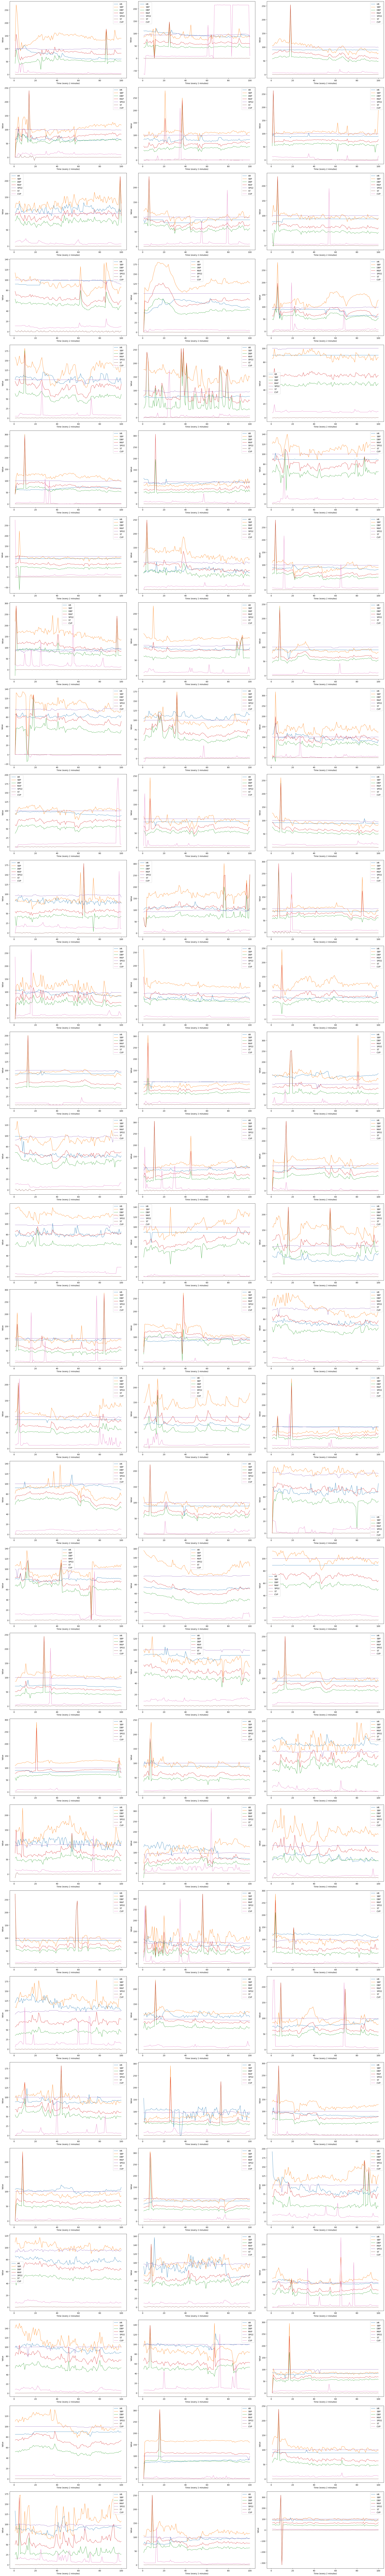

In [10]:
visualize(data_tensor[:90], feature_names=['HR', 'SBP', 'DBP', 'MAP', 'SPO2', 'ST', 'CVP'])